In [44]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import AgglomerativeClustering #계층적 군집분석
from sklearn.preprocessing import StandardScaler
import mglearn
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']= False

### 계층적 군집분석

In [45]:
x, y = make_blobs(random_state=1)

In [46]:
#모델 불러오기
agg = AgglomerativeClustering(n_clusters=3)
#학습, 예측
a = agg.fit_predict(x)

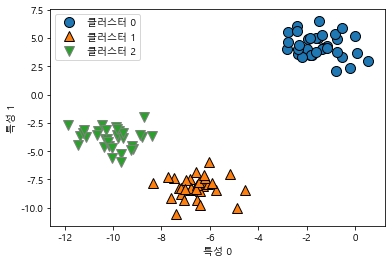

In [47]:
mglearn.discrete_scatter(x[:,0], x[:,1], a)
plt.legend(['클러스터 0','클러스터 1','클러스터 2'], loc='best')
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show()

### scipy - dendrogram을 통한 계층적 군집 분석

In [48]:
from scipy.cluster.hierarchy import dendrogram, ward, linkage

In [49]:
x, y = make_blobs(random_state=0, n_samples=12)

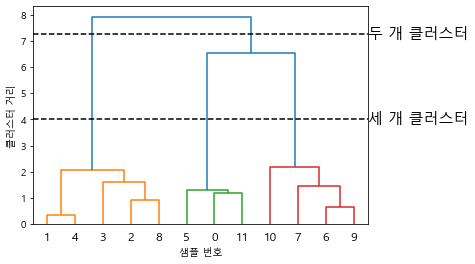

In [50]:
# 데이터 배열 x에 ward 함수를 적용
# 계층적군집을 수행할 때 거리 정보가 담긴 배열을 리턴
linkage_array = ward(x)

# 클러스터 간 거리 정보가 담긴 linkage_array를 사용해서 덴드로 그램을 그림
dendrogram(linkage_array)

# 클러스터 개수를 구분하는 라인을 그어서 그려봄
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, '두 개 클러스터', va='center', fontdict={'size':15})
ax.text(bounds[1], 4, '세 개 클러스터', va='center', fontdict={'size':15})
plt.xlabel('샘플 번호')
plt.ylabel('클러스터 거리')
plt.show()

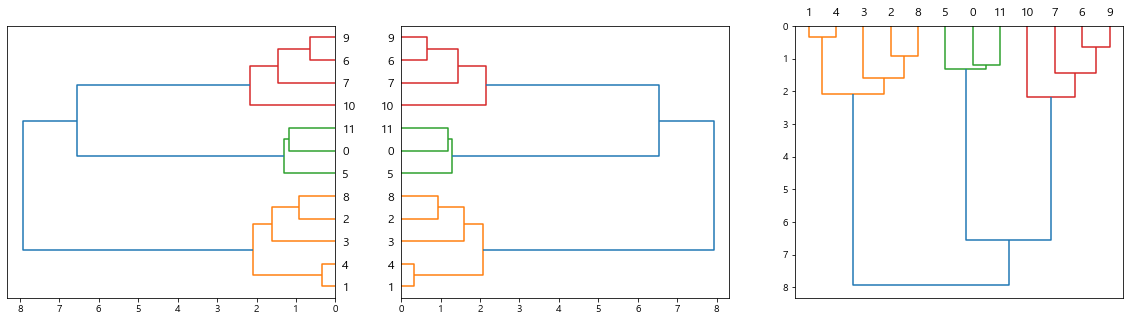

In [51]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(1,3,1)
#linkage(데이터, method='거리측정방식')
d1 = linkage(x, method='ward')
#orientation='방향' = 그림의 방향 설정
dr1 = dendrogram(d1, orientation='left')

ax2 = fig.add_subplot(1,3,2)
d2 = linkage(x, method='ward')
dr2 = dendrogram(d2, orientation='right')

ax3 = fig.add_subplot(1,3,3)
d3 = linkage(x, method='ward')
dr3 = dendrogram(d3, orientation='bottom')

plt.show()

### DBSCAN

In [52]:
from sklearn.cluster import DBSCAN

In [53]:
dbscan = DBSCAN()
pred = dbscan.fit_predict(x)

In [54]:
#make_blob
print('클러스터 레이블: ', pred)

클러스터 레이블:  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [55]:
x, y= make_moons(n_samples=200, noise=0.05, random_state=0)

In [56]:
#스케일러
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [57]:
dbscan = DBSCAN()
clusters = dbscan.fit_predict(x_scaled)

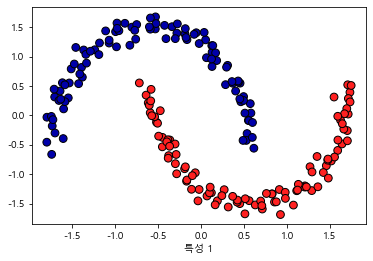

In [58]:
plt.scatter(x_scaled[:,0], x_scaled[:,1], c = clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel('특성 0')
plt.xlabel('특성 1')
plt.show()
